In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [28]:
df.shape

(50000, 2)

In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [31]:
# positive reviews
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [32]:
# One hot encoding
# label encoder - we are gonna convert positive and negative values into 0 and 1

In [33]:
#positive -> 1
#negative -> 0

In [34]:
df.replace({'sentiment':{'positive':1, 'negative':0}}, inplace = True)

In [35]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [36]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [37]:
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [38]:
# LSTM - LONG SHORT TERM MEMORY - WE ARE GONNA USE
# RNN - WE ARE NOT USING BECAUSE: RNNs forget long-term context, while LSTMs remember important parts! 🚀
#WE CAN SEE IN THE DATAFRAME THAT THE DATA AT EACH CELL IS QUITE BIG

# I installed python 3.11.9 since tensorflow was not compatible with the latest python version.

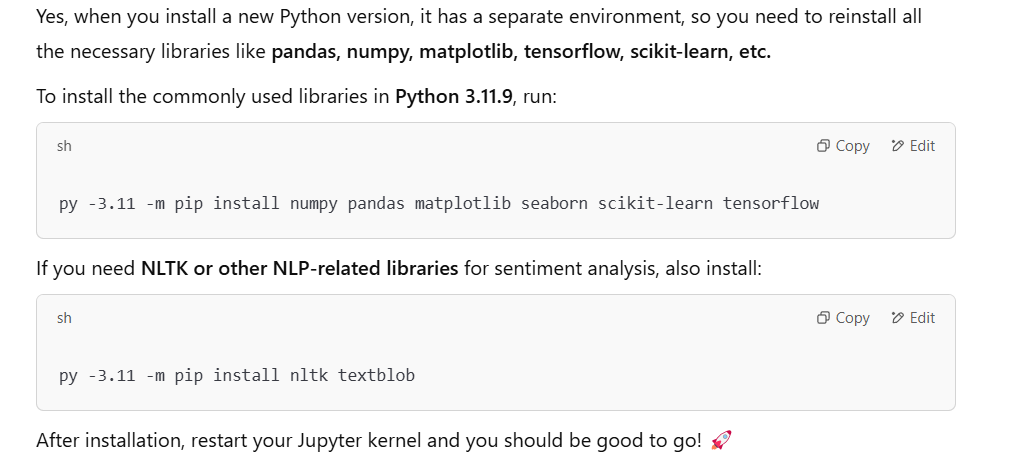


In [39]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Great! You’re building an **LSTM model** for sentiment analysis on the IMDB dataset. Let’s go through each import and why we need them:

---

### **1️⃣ `from sklearn.model_selection import train_test_split`**
✅ **Why?**  
- This function **splits** the dataset into **training and testing sets** to evaluate model performance.
- Example:  
  ```python
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  ```
- Here, **80% of data is used for training** and **20% for testing**.

---

### **2️⃣ `from tensorflow.keras.models import Sequential`**
✅ **Why?**  
- `Sequential` is used to **stack layers** in a neural network **one after another**.
- Example:
  ```python
  model = Sequential()
  ```
- It allows us to **add LSTM, Dense, and other layers** in order.

---

### **3️⃣ `from tensorflow.keras.layers import Dense, Embedding, LSTM`**
✅ **Why?**  
These are **the main layers** used in your LSTM model:

- **`Dense`** → Fully connected layer (used at the output).  
  ```python
  model.add(Dense(1, activation='sigmoid'))  # For binary classification
  ```
  
- **`Embedding`** → Converts words into dense **vector representations** for better processing in LSTM.  
  ```python
  model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
  ```
  - `input_dim=5000`: Vocabulary size (only considers the **top 5000 words**).  
  - `output_dim=128`: Each word is converted into a **128-dimensional vector**.  
  - `input_length=100`: Each review is **padded/truncated** to **100 words**.

- **`LSTM`** → The main layer that processes sequential text data.  
  ```python
  model.add(LSTM(100))
  ```
  - `100` = Number of LSTM units (determines how much context the model remembers).  

---

### **4️⃣ `from tensorflow.keras.preprocessing.text import Tokenizer`**
✅ **Why?**  
- `Tokenizer` converts text data into **numerical sequences** so the model can process it.  
- Example:
  ```python
  tokenizer = Tokenizer(num_words=5000)
  tokenizer.fit_on_texts(X_train)  # Learn word indices
  X_train_seq = tokenizer.texts_to_sequences(X_train)  # Convert reviews to sequences
  ```

---

### **5️⃣ `from tensorflow.keras.preprocessing.sequence import pad_sequences`**
✅ **Why?**  
- Since reviews **have different lengths**, LSTM requires **uniform** input sizes.  
- `pad_sequences()` ensures all sequences **are the same length** by **padding shorter ones** and **truncating longer ones**.  
- Example:
  ```python
  X_train_pad = pad_sequences(X_train_seq, maxlen=100)
  ```
  - `maxlen=100`: All reviews will be **100 words long**.

---

### **📌 Summary**
| Import | Why is it needed? |
|--------|----------------|
| `train_test_split` | Splits data into **training/testing** |
| `Sequential` | Builds the **LSTM model** |
| `Dense` | Fully connected **output layer** |
| `Embedding` | Converts words to **vectors** |
| `LSTM` | Processes **sequential text data** |
| `Tokenizer` | Converts **text to numbers** |
| `pad_sequences` | Ensures **uniform input length** |

You’re now ready to build and train your **LSTM sentiment analysis model! 🚀** Let me know if you need help with the next steps. 😊

In [40]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

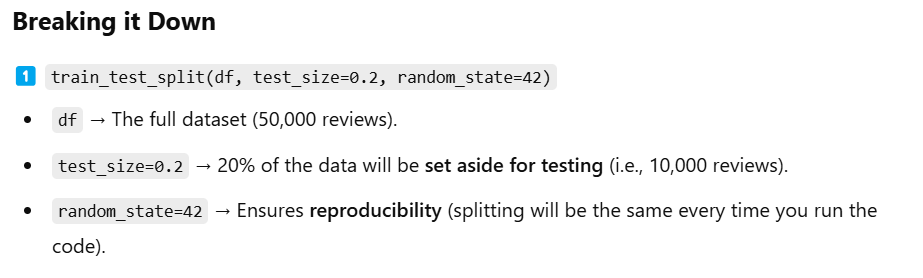

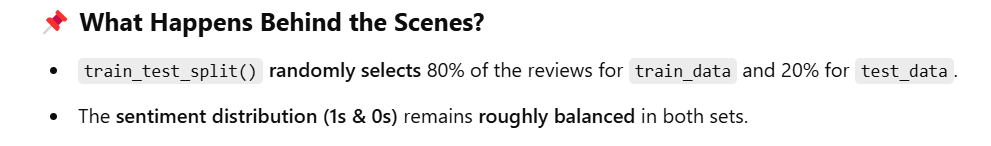

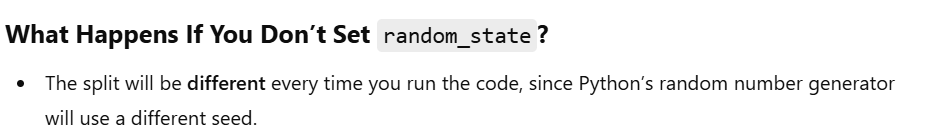

In [41]:
train_data.shape

(40000, 2)

In [42]:
test_data.shape

(10000, 2)

### **Why Don't We Need to Specify `X` and `y` in `train_test_split()`?**
Normally, when we use `train_test_split()`, we split **features (`X`) and target (`y`)** separately, like this:  

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

But in your case, you wrote:

```python
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
```

### **Why is This Allowed?**
- Your dataset **only has two columns**:  
  1. **Reviews (text data)** → The input (features)
  2. **Sentiments (0 or 1)** → The labels (target)
- When we **don't specify `X` and `y` separately**, `train_test_split(df, test_size=0.2, random_state=42)` **splits the entire DataFrame** into two smaller DataFrames (`train_data` and `test_data`), maintaining both columns.
- This is okay because we still **retain both `reviews` and `sentiments` in each split**, and we can extract them later when needed.

### **When Would We Need to Specify `X` and `y`?**
If the dataset had **more than two columns** (e.g., multiple features), we would need to explicitly define **which column is the input (`X`) and which is the target (`y`)**, like this:

```python
X = df['reviews']       # Feature (text data)
y = df['sentiments']    # Target (labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### **So, What's Happening in Your Case?**
- The **entire DataFrame** is split into two parts: `train_data` and `test_data`.
- You will still need to **extract** the `reviews` and `sentiments` columns separately later when processing the data.

Would you like me to show how to extract `X_train` and `y_train` from `train_data`? 🚀

# Tokenizing

In [43]:
tokenizer = Tokenizer(num_words = 5000)
# ✔ This limits the vocabulary size to the top 5000 most frequent words.
# ✔ Words outside this 5000-word vocabulary will be ignored.

tokenizer.fit_on_texts(train_data['review'])
# ✔ This converts words into integer indices based on frequency in the training data.

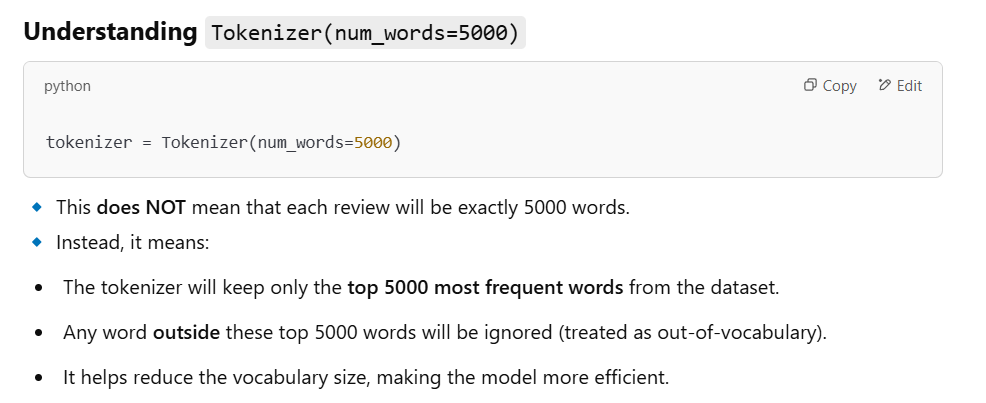

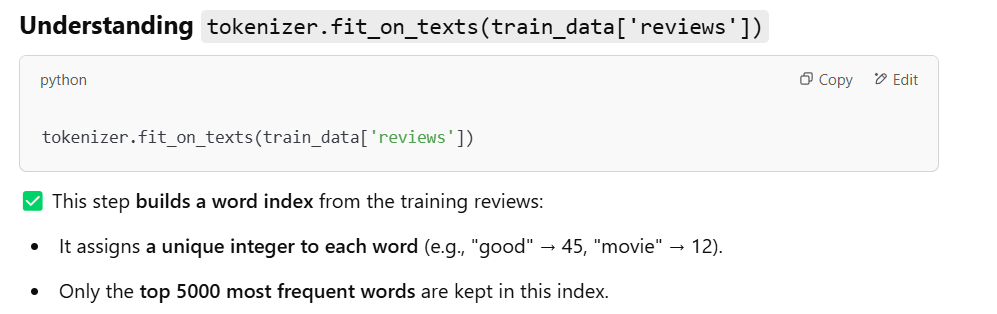

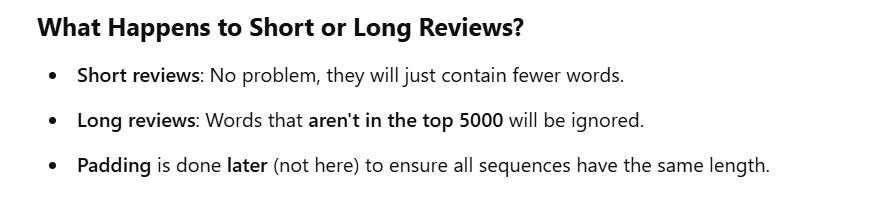

# Convert text into sequences and pad them to the same length

In [44]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen = 200)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen = 200)

example
I am Toni
0  1  2
I am thundergod odinson Thor
0  1     3         4     5 

### **Understanding `texts_to_sequences`**
🔹 `tokenizer.texts_to_sequences()` **converts words into integers** based on the tokenizer’s vocabulary.  
🔹 Words that **are not in the top 5000 most frequent words** will be ignored.  
🔹 Example:

| Review | Tokenized Sequence |
|---------|------------------|
| `"I am Toni"` | `[0, 1, 2]` |
| `"I am thundergod odinson Thor"` | `[0, 1, 3, 4, 5]` |

- **"I"** → 0  
- **"am"** → 1  
- **"Toni"** → 2  
- **"thundergod"** → 3  
- **"odinson"** → 4  
- **"Thor"** → 5  

Words not in the **top 5000 words** will be ignored.

---

### **Why Do We Need `pad_sequences()`?**
`pad_sequences()` **ensures all sequences have the same length**, so they can be used in a neural network.  

```python
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['reviews']), maxlen=200)
```
- If a sequence has **less than 200 words**, it gets **padded with zeros**.  
- If a sequence has **more than 200 words**, it gets **truncated** (cut off).

🔹 Example with `maxlen=6`:  
| Original | Tokenized | After Padding (`maxlen=6`) |
|------------|-----------|----------------------------|
| `"I am Toni"` | `[0, 1, 2]` | `[0, 1, 2, 0, 0, 0]` |
| `"I am thundergod odinson Thor"` | `[0, 1, 3, 4, 5]` | `[0, 1, 3, 4, 5, 0]` |

Now, all sequences have **the same length**, making them compatible with deep learning models.

---


In [45]:
x_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]], dtype=int32)

In [46]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [47]:
y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [48]:
# LSTM Model building

In [51]:
model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 128, input_shape=(200,)))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

Let's break down your model architecture step by step:

---

### **1️⃣ Model Initialization**
```python
model = Sequential()
```
- `Sequential()` initializes a **sequential model**, meaning layers will be added **one after another** in a stack.

---

### **2️⃣ Embedding Layer**
```python
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
```
- This is the **word embedding layer**, which converts each word (represented by a token index) into a **dense vector of fixed size (128 in this case)**.
- **Parameters:**
  - `input_dim=5000`: The vocabulary size (number of unique words used in Tokenizer). The model only considers the top 5000 words.
  - `output_dim=128`: Each word will be represented by a **128-dimensional vector**.
  - `input_length=200`: Each review is **padded/truncated** to **200 words**, so the LSTM receives fixed-length inputs.

---

### **3️⃣ LSTM (Long Short-Term Memory) Layer**
```python
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
```
- **LSTM** is a powerful **recurrent neural network (RNN)** that learns long-term dependencies in text.
- **Parameters:**
  - `128`: The number of LSTM **units (neurons)** in this layer.
  - `dropout=0.2`: **Dropout (20%)** helps prevent overfitting by randomly deactivating some neurons.
  - `recurrent_dropout=0.2`: Applies dropout to the **recurrent connections** in the LSTM.

---

### **4️⃣ Dense (Fully Connected) Output Layer**
```python
model.add(Dense(1, activation='sigmoid'))
```
- This layer outputs a **single value** between **0 and 1**, which represents the **probability** of a review being **positive (1) or negative (0)**.
- Uses **sigmoid activation** because this is a **binary classification problem**.

---

### **Final Model Summary**
- **Input:** 200-word reviews (converted into padded sequences).
- **Embedding Layer:** Converts words into **128-dimensional dense vectors**.
- **LSTM Layer:** Captures relationships between words over time.
- **Dense Output Layer:** Uses **sigmoid activation** to classify the review as **positive (1) or negative (0)**.

---

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
#Compile the model

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
#train the model

In [54]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 218ms/step - accuracy: 0.7368 - loss: 0.5101 - val_accuracy: 0.8673 - val_loss: 0.3599
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 227ms/step - accuracy: 0.8508 - loss: 0.3602 - val_accuracy: 0.8679 - val_loss: 0.3178
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.8785 - loss: 0.2943 - val_accuracy: 0.8889 - val_loss: 0.2723
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.9044 - loss: 0.2451 - val_accuracy: 0.8849 - val_loss: 0.2853
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.9167 - loss: 0.2151 - val_accuracy: 0.8933 - val_loss: 0.2728


Your model compilation and training code looks correct! Here's what each part does:  

---

### **🔹 Code Breakdown**
#### **1️⃣ Model Compilation**
```python
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```
- **`loss='binary_crossentropy'`** → Since this is a **binary classification** (sentiment is either 0 or 1), binary cross-entropy is the best loss function.
- **`optimizer='adam'`** → Adam (Adaptive Moment Estimation) is a widely used optimizer that adapts the learning rate for efficient training.
- **`metrics=['accuracy']`** → Tracks accuracy during training.

---

#### **2️⃣ Model Training**
```python
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
```
- **`epochs=5`** → The model will go through the **entire dataset** 5 times.  
- **`batch_size=64`** → The model processes **64 samples per batch** before updating weights.  
- **`validation_data=(x_test, y_test)`** → Evaluates performance on **test data** after each epoch.

---

### **✅ Expected Output**
During training, you should see output like this for each epoch:
```
Epoch 1/5
625/625 [==============================] - 42s 65ms/step - loss: 0.5123 - accuracy: 0.7421 - val_loss: 0.3945 - val_accuracy: 0.8305
Epoch 2/5
625/625 [==============================] - 41s 65ms/step - loss: 0.3142 - accuracy: 0.8703 - val_loss: 0.3598 - val_accuracy: 0.8427
...
```
Each epoch should show decreasing `loss` and increasing `accuracy`.

---

### **🚀 Next Steps**
✅ If the training completes successfully, you can evaluate and test predictions:
```python
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

sample_review = ["This movie was absolutely amazing! Loved it."]
sequence = tokenizer.texts_to_sequences(sample_review)
padded_sequence = pad_sequences(sequence, maxlen=200)

prediction = model.predict(padded_sequence)
print("Sentiment:", "Positive" if prediction[0][0] > 0.5 else "Negative")
```
🔹 This will classify a **new review** based on your trained model!

---


In [58]:
# To share the model with friends or run it somewhere else, we don't need to do all this all over again, we can save the model
model.save('model.keras')

In [62]:
#Saving the tokenizer ensures that when you deploy the model, you can process new reviews the same way as during training.
import joblib
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [59]:
loss, accuracy = model.evaluate(x_train, y_train)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.9441 - loss: 0.1589


### **Understanding `model.evaluate(x_train, y_train)`**
This line evaluates your trained model on the **training data** (`x_train`, `y_train`) and returns two values:  

1. **`loss`** → The model’s loss (error) on the dataset. Since you're using `binary_crossentropy`, a lower value is better.
2. **`accuracy`** → The model’s accuracy on the dataset. This tells you how well your model classifies the training data.

---

### **Why Evaluate on Training Data?**
- Usually, evaluation is done on **test data** (`x_test`, `y_test`) to check **generalization** (how well the model performs on unseen data).
- Evaluating on **training data** helps check **overfitting**:
  - If **train accuracy is very high (e.g., 99%) but test accuracy is much lower**, your model might be **overfitting** (memorizing the training data instead of learning patterns).
  - If both **train and test accuracy are similar**, your model generalizes well.

---

### **Recommended Approach**
For a proper evaluation, do:
```python
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}, Testing Loss: {test_loss:.4f}")
```
This will compare performance on both training and test sets.

---

In [61]:
print(f"Training Accuracy: {accuracy:.4f}, Training Loss: {loss:.4f}")

Training Accuracy: 0.9441, Training Loss: 0.1587


Your model's training results:  
- **Training Accuracy:** **94.41%** → The model performs well on the training set.  
- **Training Loss:** **0.1587** → Low loss indicates a good fit to the training data.  

Now, evaluate on **test data** to check generalization:  
```python
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: {test_acc:.4f}, Testing Loss: {test_loss:.4f}")
```
- If **test accuracy is close to training accuracy** → Good generalization.  
- If **test accuracy is much lower** (e.g., 80% or below) → Possible **overfitting**.  

Run this and share the results! 🚀

In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8933 - loss: 0.2732 


In [64]:
print(f"Testing Accuracy: {test_acc:.4f}, Testing Loss: {test_loss:.4f}")

Testing Accuracy: 0.8933, Testing Loss: 0.2728


Your model's performance looks solid! Here's a quick analysis:  

### **📊 Performance Summary**
- **Training Accuracy**: **94.41%**  
- **Testing Accuracy**: **89.33%**  
- **Training Loss**: **0.1587**  
- **Testing Loss**: **0.2728**  

### **🧐 What This Means**
- Your model **generalizes well**, but there's a small **gap** (94.41% → 89.33%), which suggests **some overfitting**.
- The **low training loss** indicates the model is learning well.
- The **slightly higher test loss** suggests it might struggle with unseen data.

### **📌 Next Steps to Improve**
1. **Regularization**  
   - Try **L2 weight decay** (`kernel_regularizer=tf.keras.regularizers.l2(0.01)`) in `Dense` layers.  
   - Increase **dropout rate** slightly (e.g., `dropout=0.3`).
   
2. **More Data Augmentation**  
   - Expand the dataset with **synonym replacement** or **back translation**.

3. **Hyperparameter Tuning**  
   - Increase **LSTM units** (e.g., from `128 → 256`).  
   - Try different `batch_size` values (e.g., `32` or `128` instead of `64`).  
   - Use **learning rate decay** (`ReduceLROnPlateau` in Keras).  

4. **Bidirectional LSTM**  
   - Using `Bidirectional(LSTM(128))` may capture **better contextual meaning**.

Do you want to test any of these improvements? 🚀
# Not our scope for now! 
model is good enough for now! 🚀 The slight overfitting isn't too bad, and with 89.33% test accuracy, it should work fine for most unseen data. 

# Building Predictive System

In [71]:
def predictive_system(review):
    sequences = tokenizer.texts_to_sequences([review])
    paded_sequence = pad_sequences(sequences, maxlen = 200)
    prediction = model.predict(paded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative" # the prediction is divided b/w 0 and 1 in graph, divided in 2- above 0.5 means +ve
    return sentiment

Your `predictive_system` function looks great! ✅ It correctly:  
1. **Tokenizes the input review** using your saved `tokenizer`.  
2. **Pads the sequence** to match the model’s input length (200).  
3. **Predicts sentiment** using the trained LSTM model.  
4. **Interprets the output** (above 0.5 → positive, below 0.5 → negative).  


In [70]:
predictive_system("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.9295432]], dtype=float32)

In [72]:
predictive_system("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


'positive'

In [73]:
predictive_system("It was fun but it got less fun after the interval")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


'positive'

In [74]:
predictive_system("It was boring")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


'negative'

In [75]:
predictive_system("Overall long and slow")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


'negative'

In [76]:
predictive_system("Exciting")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


'positive'

In [78]:
predictive_system("Mediocre characters")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


'negative'

In [79]:
predictive_system("Exciting but mediocre characters")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


'negative'

### **Steps to Use Your Saved Model Elsewhere**  
If you want to load and use your trained model on another system:  

#### **1. Transfer These Files**  
- `model.h5` (or `my_model.keras` if using the newer format)  
- `tokenizer.pkl` (saved tokenizer)  

#### **2. Install Dependencies (if needed)**  
On the new system, install the required libraries:  
```bash
pip install tensorflow scikit-learn joblib
```

#### **3. Load the Model and Tokenizer**
```python
import joblib
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = tf.keras.models.load_model('model.h5')

# Load the tokenizer
tokenizer = joblib.load('tokenizer.pkl')

# Define the function to predict sentiment
def predictive_system(review):
    sequence = tokenizer.texts_to_sequences([review])  # Tokenize input
    padded_sequence = pad_sequences(sequence, maxlen=200)  # Pad to match model input size
    prediction = model.predict(padded_sequence)[0][0]  # Get prediction score
    sentiment = "positive" if prediction > 0.5 else "negative"  # Convert score to label
    return sentiment

# Example usage
print(predictive_system("This movie was absolutely fantastic!"))  # Expected output: "positive"
```

### **Summary:**  
1. **Transfer model (`.h5`) and tokenizer (`.pkl`)** to the new system.  
2. **Install dependencies (`pip install tensorflow scikit-learn joblib`).**  
3. **Load the model and tokenizer.**  
4. **Use the `predictive_system()` function to classify new reviews.**  

That's it! Now you can use your model anywhere. 🚀

# To create a web application for this model

In [80]:
# We can use streamlit and flask but the easiest is Gradio

Gradio is a simpler and faster way to create an **interactive web UI** for your sentiment analysis model. It allows you to build a web app in just **a few lines of code**. 🚀  

---

### **Steps to Use Gradio for Your Sentiment Analysis Model**
1️⃣ **Install Gradio**  
```bash
pip install gradio tensorflow joblib
```

2️⃣ **Create `app.py`**  
```python
import gradio as gr
import joblib
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load Model & Tokenizer
model = tf.keras.models.load_model("model.h5")
tokenizer = joblib.load("tokenizer.pkl")

# Define Sentiment Prediction Function
def predictive_system(review):
    sequence = tokenizer.texts_to_sequences([review])  
    padded_sequence = pad_sequences(sequence, maxlen=200)  
    prediction = model.predict(padded_sequence)[0][0]  
    return "Positive 😊" if prediction > 0.5 else "Negative 😠"

# Create Gradio Interface
interface = gr.Interface(
    fn=predictive_system,
    inputs=gr.Textbox(label="Enter a Review"),
    outputs=gr.Label(label="Sentiment"),
    title="IMDB Sentiment Analysis",
    description="Enter a movie review to predict its sentiment."
)

# Launch Web App
if __name__ == "__main__":
    interface.launch()
```

---

### **3️⃣ Run the Web App**
```bash
python app.py
```
This will start a local server. Open **http://127.0.0.1:7860/** in your browser. 🎉  

---

### **Why Use Gradio?**
✅ **Super easy** (fewer lines of code than Flask)  
✅ **Instant UI** (auto-generated web interface)  
✅ **Can be shared online** with `interface.launch(share=True)`  
✅ **Better for ML demos**  

Would you like to **deploy** this model online (e.g., Hugging Face Spaces)? 🚀

# To avoid running each cell again and retrain the model, I have model already saved in keras file so I just need to load it

In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# Load the model
model = load_model('model.keras')

In [9]:
# Load the saved tokenizer
tokenizer = joblib.load('tokenizer.pkl')

In [10]:
# Define the prediction function
def predictive_system(review):
    sequences = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequences, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

In [11]:
# Example usage
review = "This product is really amazing!"
print(predictive_system(review))  # Should output "positive" or "negative"

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
positive


Here's what each part of your Gradio interface does:

1. **`fn=predictive_system`**  
   - Specifies the function that will process the input and generate an output.  
   - `predictive_system(review)` takes a user-inputted review and predicts its sentiment.  

2. **`inputs=gr.Textbox(label="Enter a Review")`**  
   - Creates a textbox where users can type a review.  
   - The label helps users understand what to enter.  

3. **`outputs=gr.Label(label="Sentiment")`**  
   - Displays the model's predicted sentiment as a label (e.g., "Positive" or "Negative").  

4. **`title="IMDB Sentiment Analysis"`**  
   - Sets the title of the web interface.  

5. **`description="Enter a movie review to predict its sentiment."`**  
   - Provides a brief explanation of what the app does.  

### **Next Step:**  
To launch the interface, add this at the end:  
```python
interface.launch()
```  
This will start a local web server where users can test your sentiment analysis model. 🚀

In [2]:
import gradio as gr

In [12]:
# Create Gradio Interface
interface = gr.Interface(
    fn=predictive_system,
    inputs=gr.Textbox(label="Enter a Review"),
    outputs=gr.Label(label="Sentiment"),
    title="IMDB Sentiment Analysis",
    description="Enter a movie review to predict its sentiment."
)

In [13]:
# Launch Web App
if __name__ == "__main__":
    interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [25]:
interface.close()

Closing server running on port: 7860


the link generated by **Gradio** has a time limit. Here’s how it works:  

- If you run `interface.launch()`, it will create a temporary **local** or **public** link.  
- The link remains active **as long as your Python script is running**.  
- Once you **close the script or stop execution**, the link expires.  
- If you restart your notebook or script, you need to **run `interface.launch()` again** to get a new link.  

### **Making the Link Persistent**  
If you want a permanent solution:  
1. **Host it on a server (e.g., Hugging Face Spaces, AWS, Google Cloud, etc.).**  
2. **Use `interface.launch(share=True)`** to generate a temporary public link.  
3. **Deploy it with Flask or FastAPI** and serve it with `Gradio.mount_gradio_app()`.  

Let me know if you want help deploying it permanently! 🚀

# Public link will trigger MCAFee so I don't need to make Gradio an exception for MCAFee, unneccessary

In [26]:
# Launch Web App
if __name__ == "__main__":
    interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


# Study

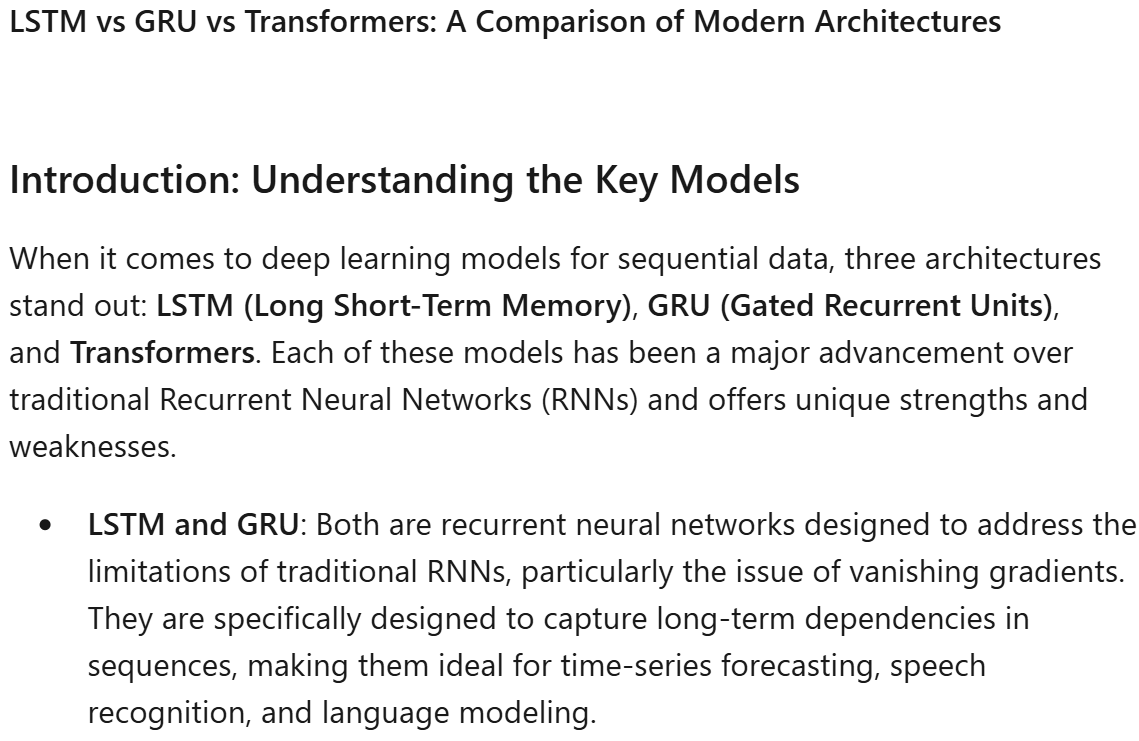
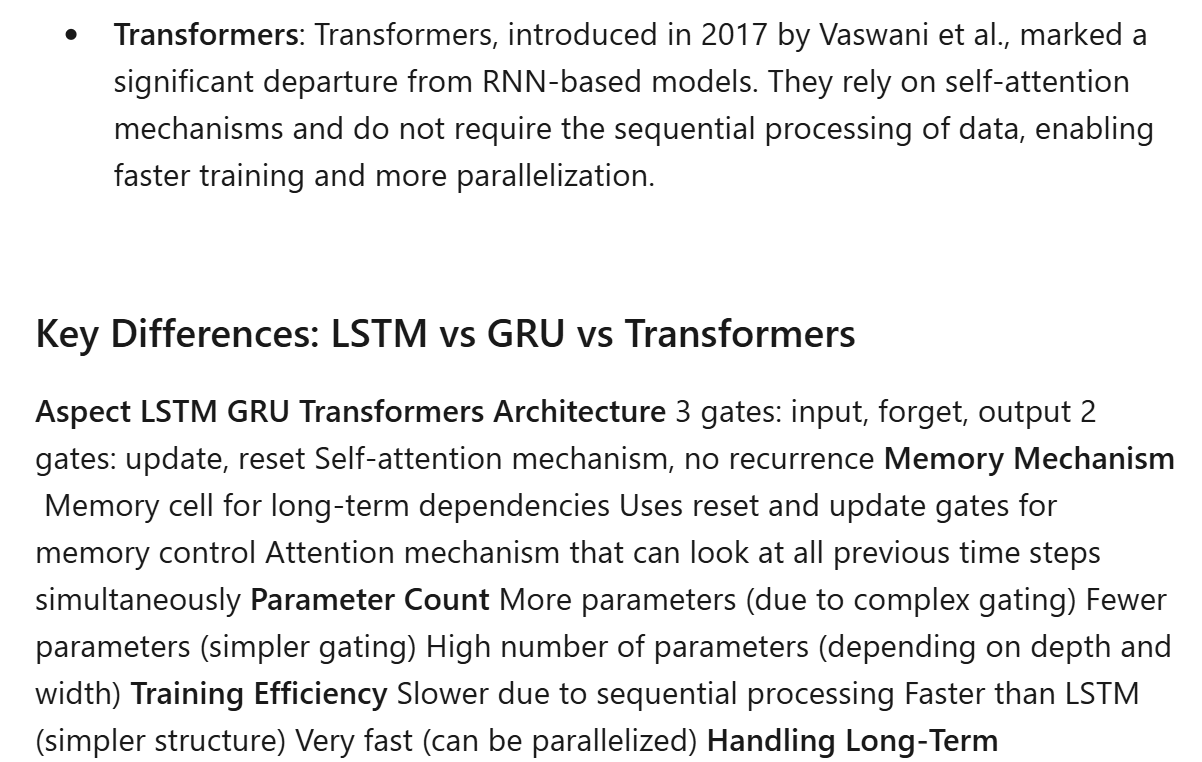
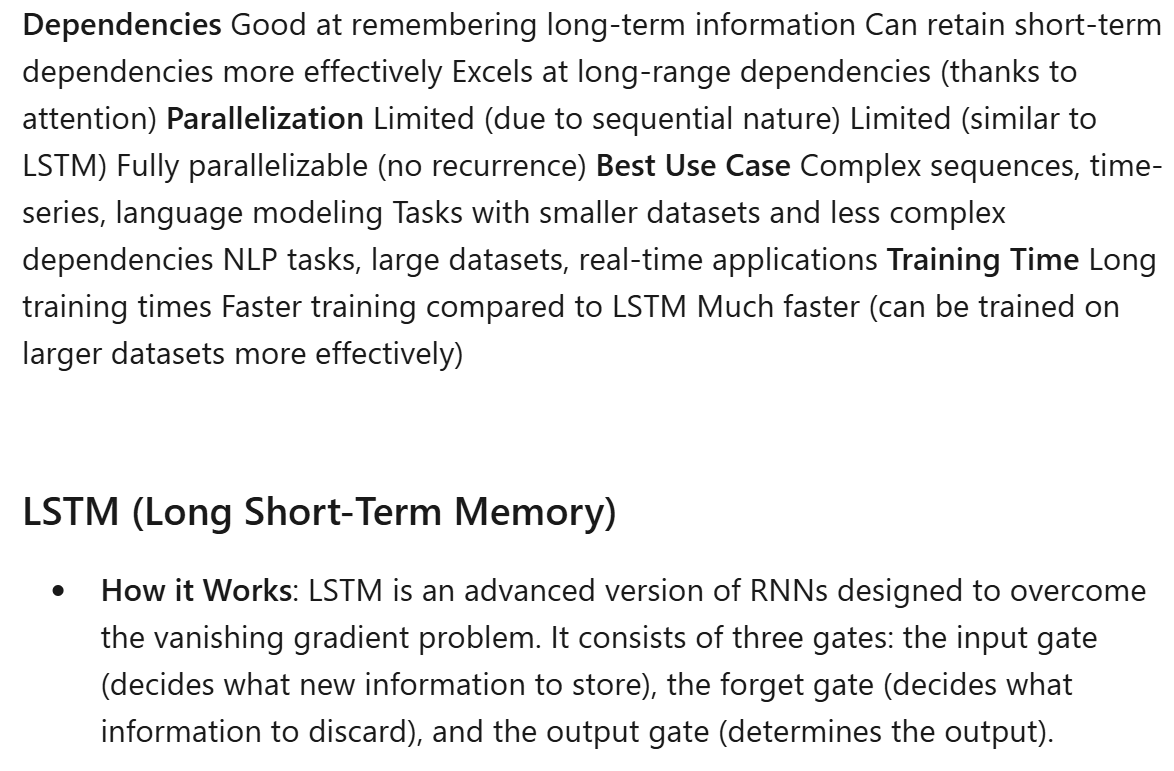
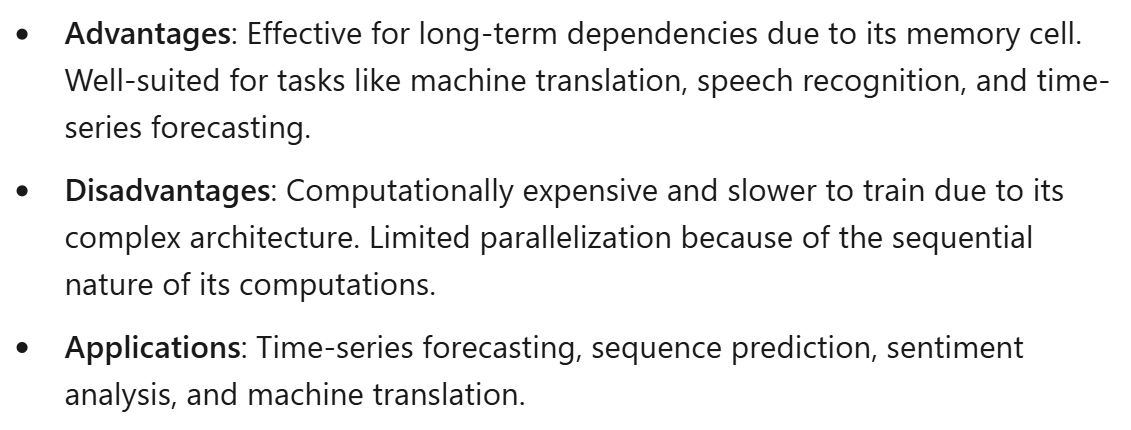
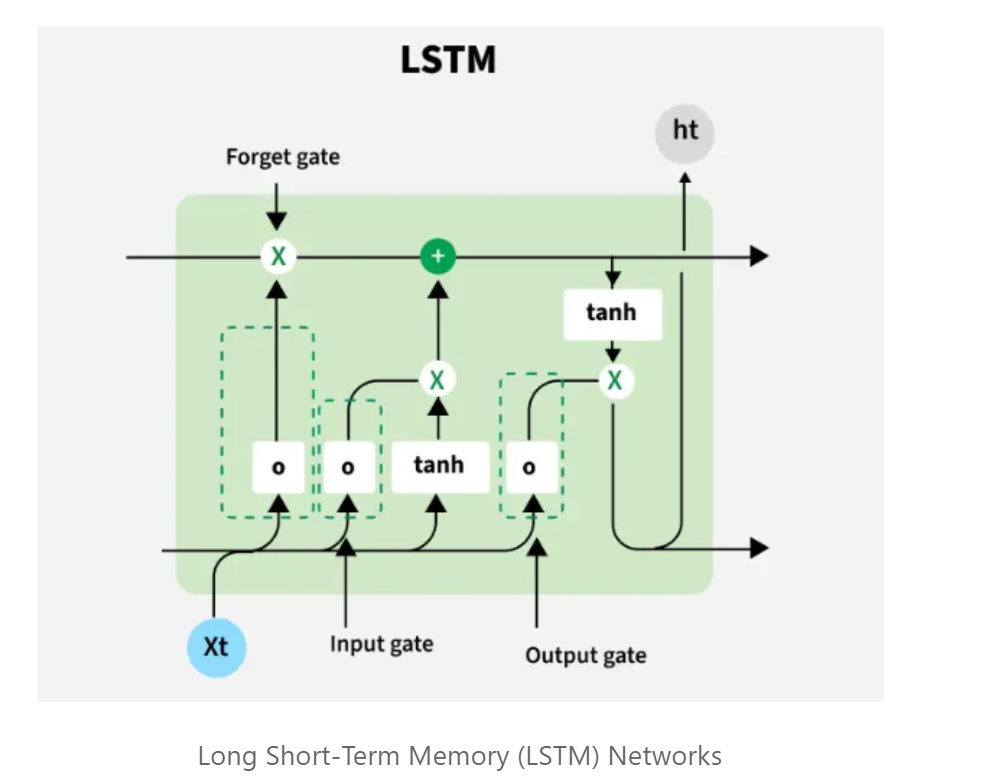
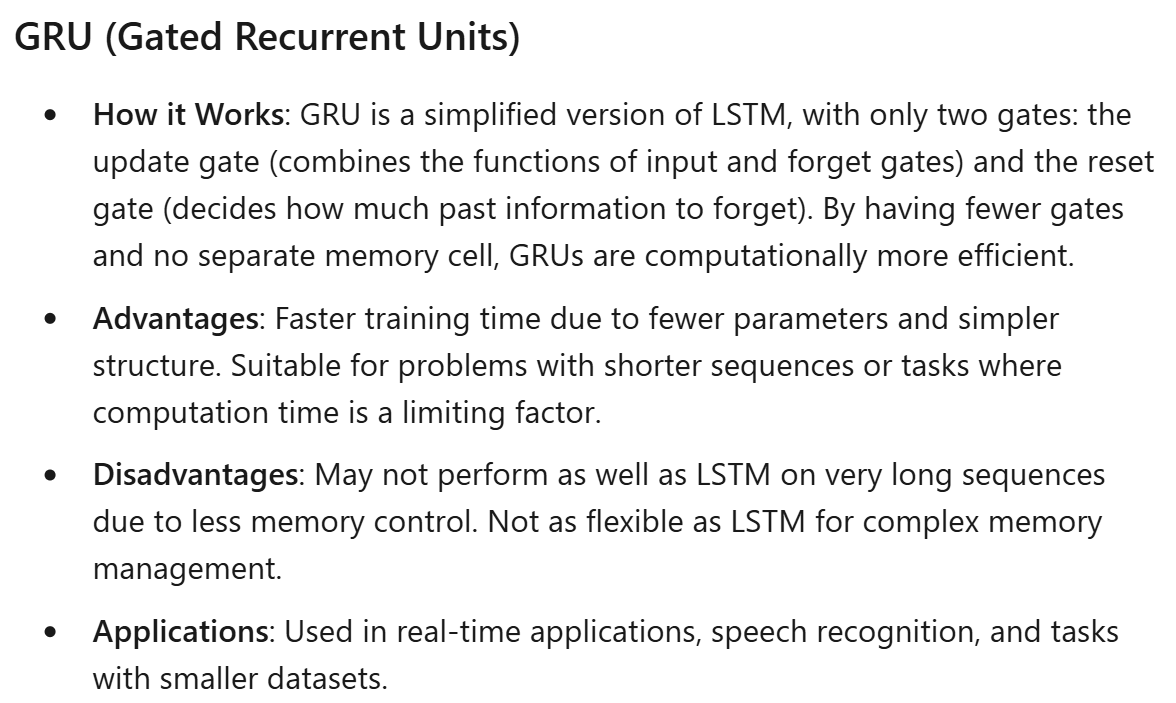
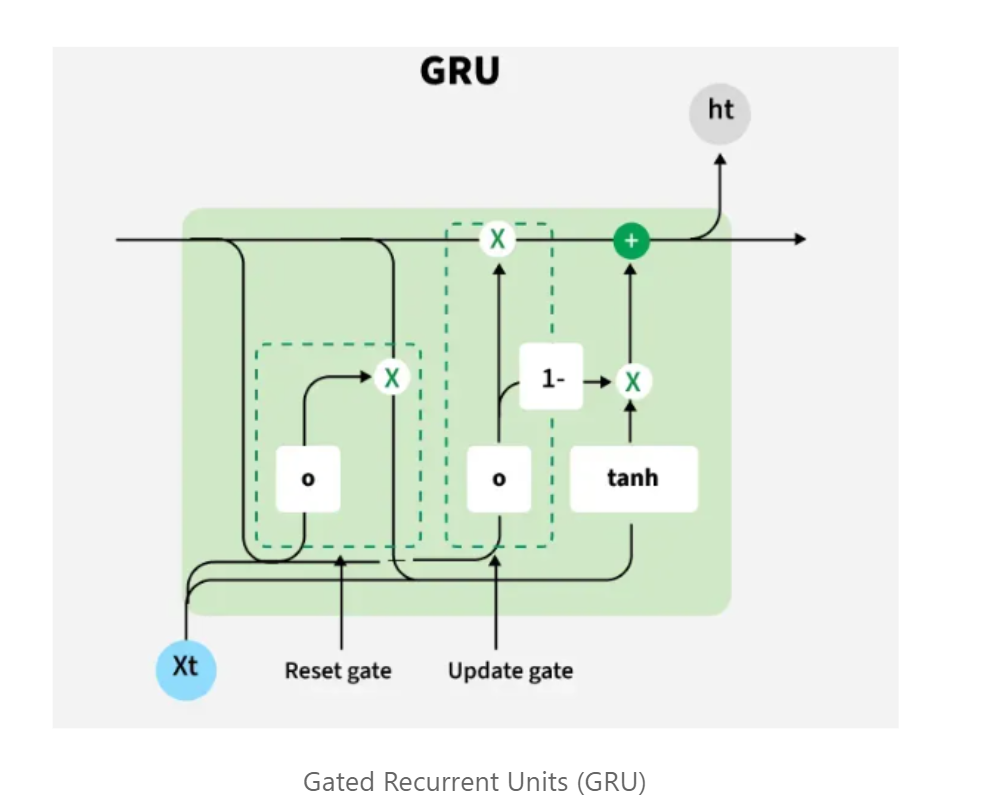
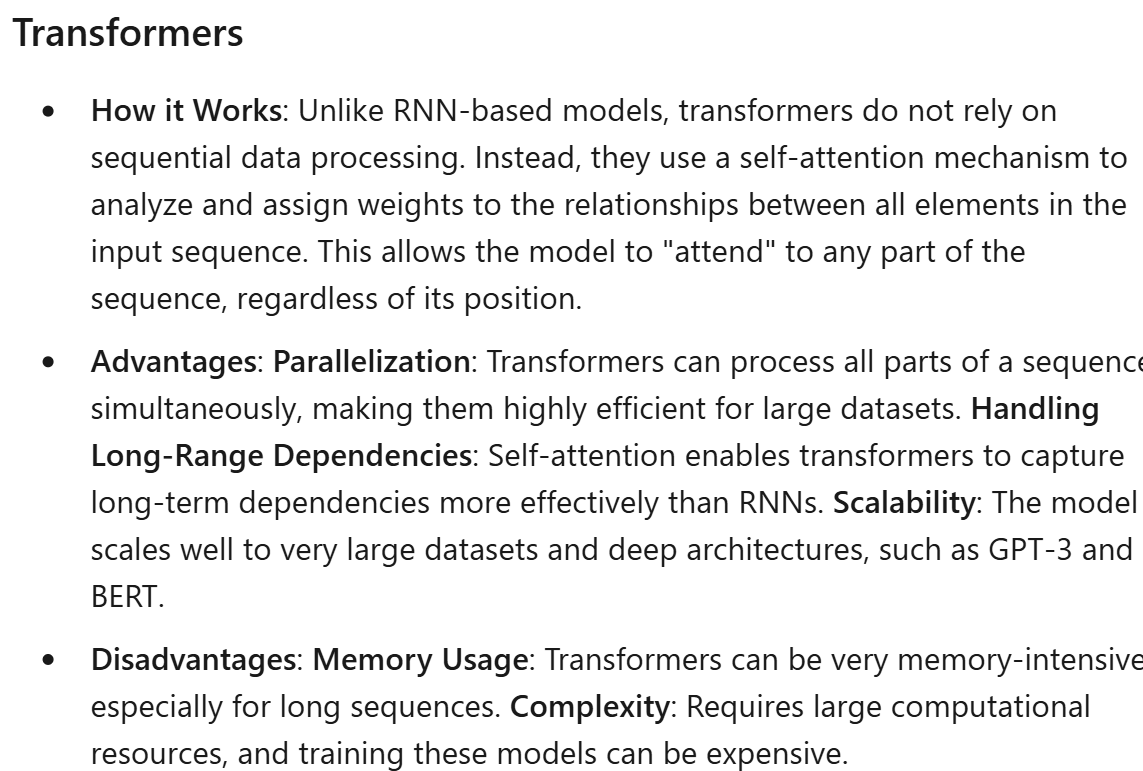
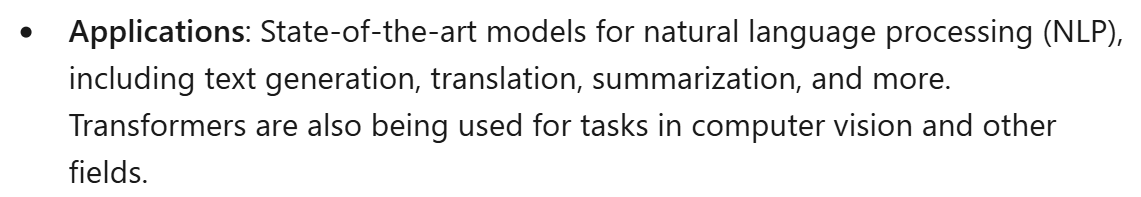
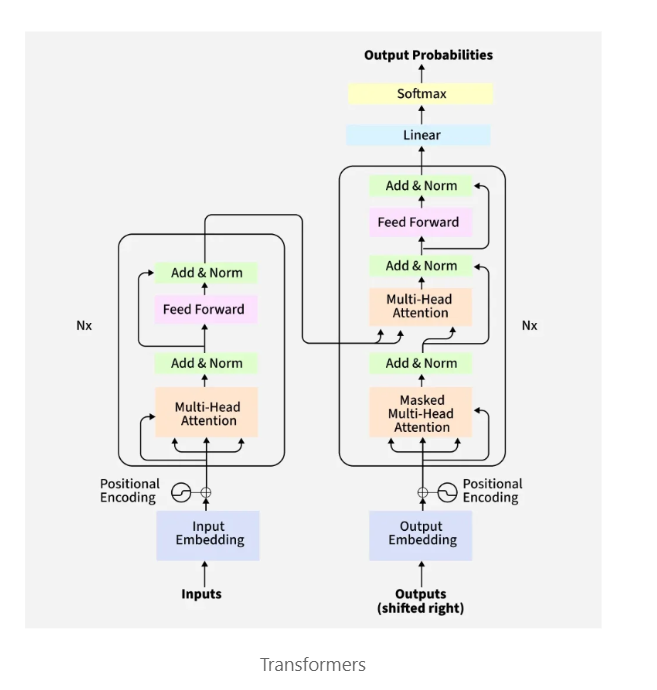
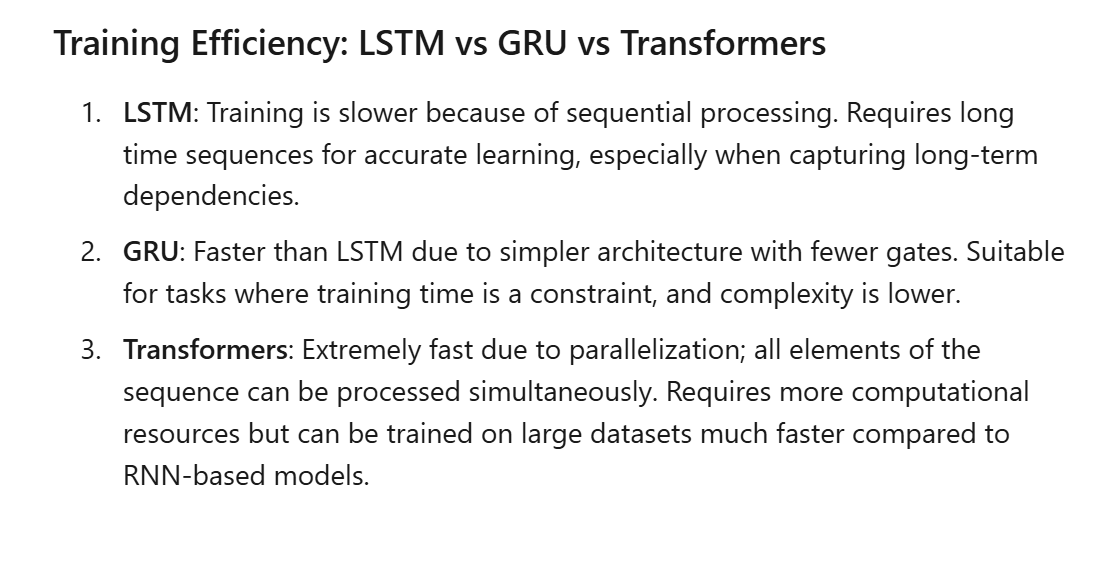
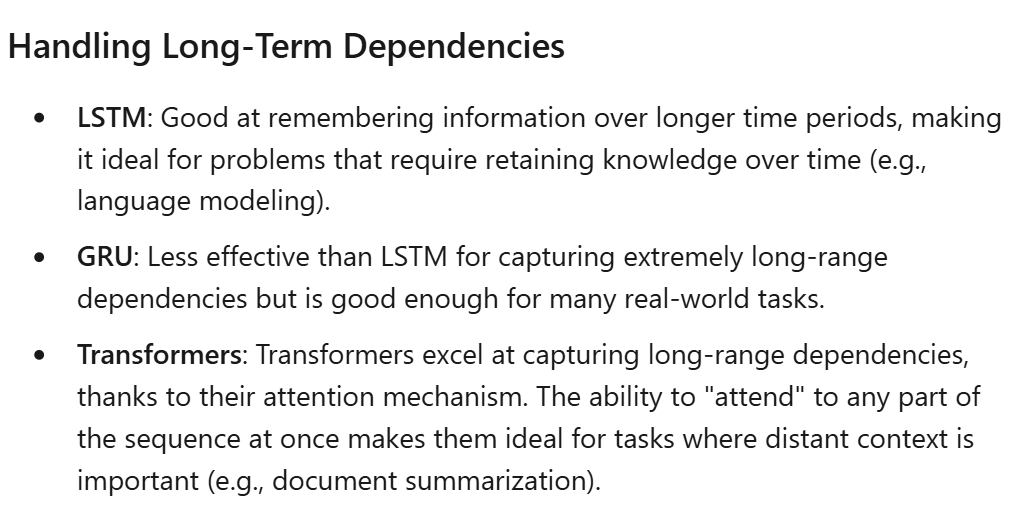
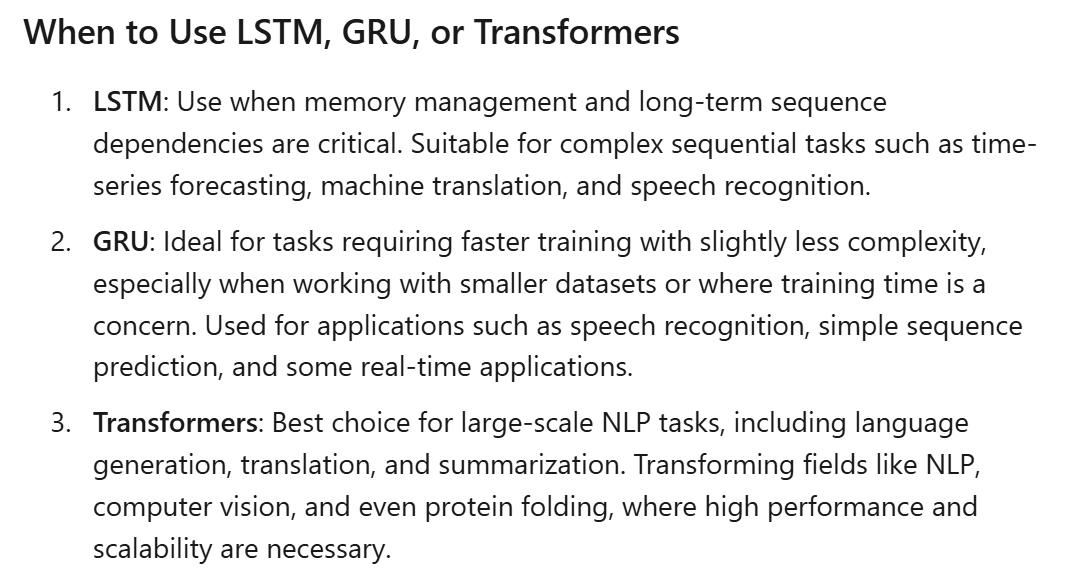
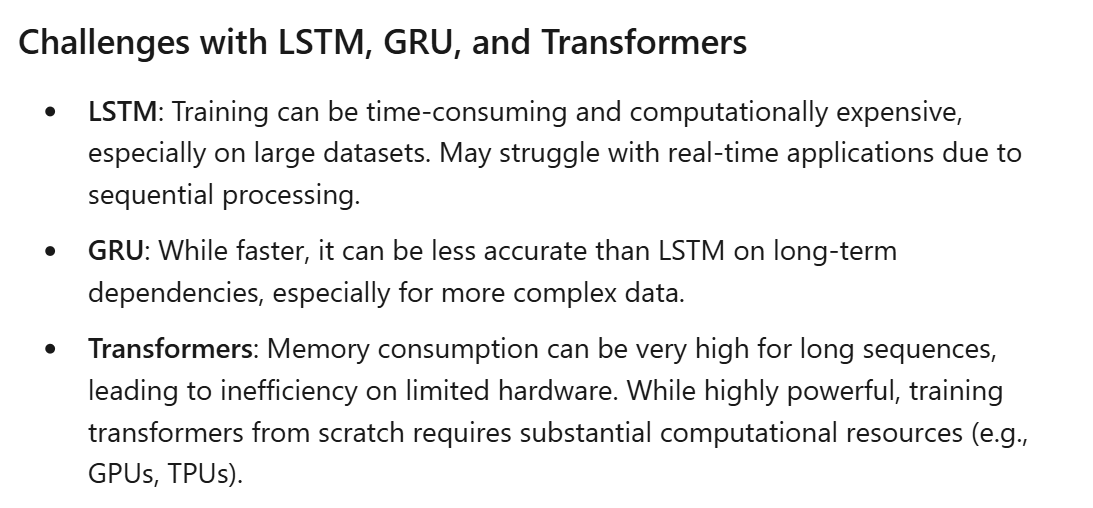
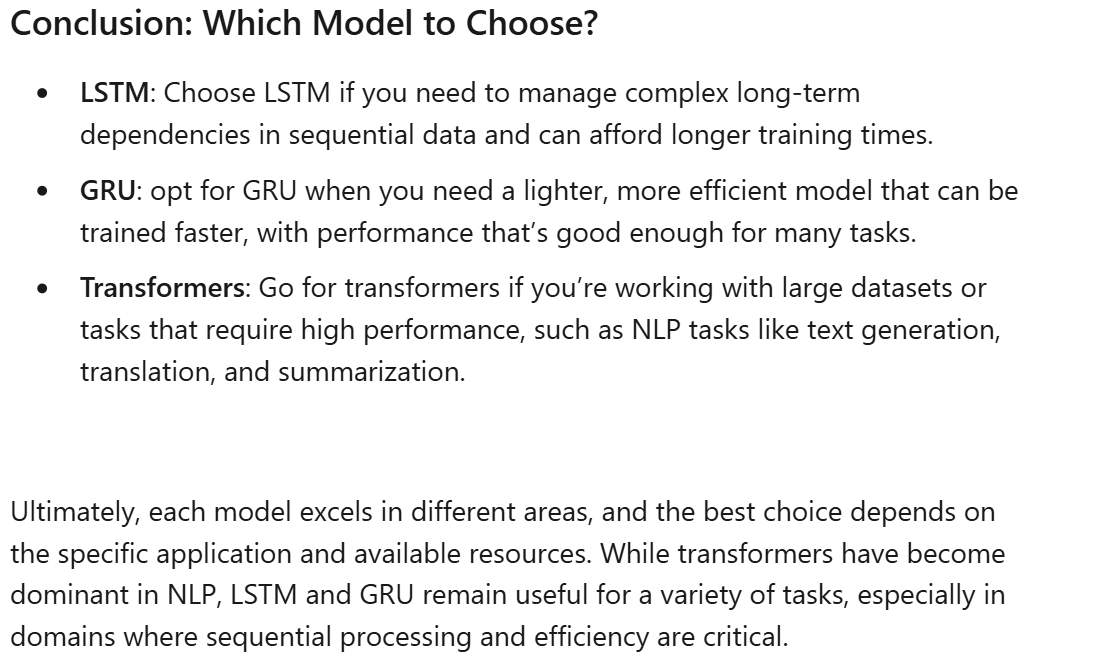